# GiziWise

The project aims to develop a mobile app for tracking the nutritional content of food. The app will use the latest nutritional data, consider regional variations, and focus on simplicity, accuracy, and ease of use. In the end, the app aims to empower users to make informed decisions, improve their health, and reduce healthcare costs.

# 1. Loading and preprocessing<a class="anchor" id="1"></a><a class="anchor" id="1"></a>

In [ ]:
import numpy as np        # Import the NumPy library for numerical operations
import pandas as pd       # Import the Pandas library for data manipulation and analysis
from pathlib import Path  # Import the Path class from the pathlib module for working with file paths
import os                 # Import the os module for operating system-related functionalities
import os.path            # Import the os.path module for working with file paths
import matplotlib.pyplot as plt  # Import the pyplot module from Matplotlib for data visualization
import tensorflow as tf   # Import the TensorFlow library for deep learning and machine learning tasks

# Downloading dataset from kaggle
! chmod 600 /content/kaggle.json
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

 99% 1.97G/1.98G [00:26<00:00, 132MB/s]
100% 1.98G/1.98G [00:26<00:00, 80.1MB/s]


In [ ]:
import zipfile

# Extracting zip file
zip_file = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip')
zip_file.extractall('/content/Dataset')

In [ ]:
paths = []   # List to store the file paths of the images
labels = []  # List to store the corresponding labels

# Iterate through the directory and its subdirectories
for dirname, _, filenames in os.walk('/content/Dataset'):
    for filename in filenames:
        if filename[-4:]=='.jpg' or '.png' or '.jpeg' or '.JPG':
            # If the file has a valid image extension, add its path to the 'paths' list
            paths+=[os.path.join(dirname, filename)]
            # Extract the label from the directory name and add it to the 'labels' list
            labels+=[dirname.split('/')[-1]]

# Print the file paths of the first three images
print(paths[0:3])

['/content/Dataset/validation/lemon/Image_10.jpg', '/content/Dataset/validation/lemon/Image_5.jpg', '/content/Dataset/validation/lemon/Image_9.png']


In [ ]:
# Import the shuffle function from the sklearn.utils module for shuffling data
from sklearn.utils import shuffle
# Create an empty DataFrame with columns 'filepath' and 'label'
data_df=pd.DataFrame(columns=['filepath','label'])
# Assign the 'paths' list to the 'filepath' column of the DataFrame  
data_df['filepath']=paths
# Extract the label from the filepath and assign it to the 'label' column using lambda function
data_df['label']=data_df['filepath'].apply(lambda x:x.split('/')[-2].replace('  ',' '))
# Extract the train/valid/test category from the filepath and assign it to the 'train/valid/test' column using lambda function
data_df['train/valid/test']=data_df['filepath'].apply(lambda x:x.split('/')[-3])

# Dropping bell pepper, capsicum, kiwi, paprika, pear, and pomegranate from data_df
labels_to_remove = ['bell pepper', 'capsicum', 'kiwi', 'paprika', 'pear', 'pomegranate']

data_df = data_df[~data_df['label'].isin(labels_to_remove)]

# Replacing the Class Label to Code Label
Class = ['apple', 'banana', 'beetroot', 'cabbage', 'carrot', 'cauliflower',
         'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic',
         'ginger', 'grapes', 'jalepeno', 'lemon', 'lettuce', 'mango',
         'onion', 'orange', 'peas', 'pineapple', 'potato', 'raddish',
         'soy beans', 'spinach', 'sweetpotato', 'tomato', 'watermelon', 'sweetcorn', 'turnip']
Code = ["ER004", "ER074", "DR010", "DR044", "DR166", "DR042",
        "NR014", "DR085",	"DR109", "DR154",	"NR008", "NR018",
        "ER002", "NR015",	"ER052", "DR145",	"ER054", "DR007",
        "ER039", "CR008",	"ER070", "BR013",	"DR126", "CR018",
        "DR008", "BR030", "DR161", "ER105", "DR085", "DR126"]
for i in range(len(Class)):
    data_df = data_df.replace(Class[i], Code[i])

In [ ]:
# Shuffle the rows of the DataFrame randomly 
data_df = shuffle(data_df) 
# Display the DataFrame 
display(data_df)

filepath  label train/valid/test
1268      /content/Dataset/train/apple/Image_49.jpg  ER004            train
1274      /content/Dataset/train/apple/Image_82.jpg  ER004            train
3399   /content/Dataset/train/eggplant/Image_33.jpg  DR154            train
1826   /content/Dataset/train/beetroot/Image_27.jpg  DR010            train
1980     /content/Dataset/train/orange/Image_63.jpg  ER039            train
...                                             ...    ...              ...
3385  /content/Dataset/train/eggplant/Image_100.jpg  DR154            train
955      /content/Dataset/train/tomato/Image_43.jpg  DR161            train
182   /content/Dataset/validation/mango/Image_3.jpg  ER054       validation
832      /content/Dataset/train/potato/Image_55.jpg  BR013            train
2232   /content/Dataset/train/jalepeno/Image_33.jpg  NR015            train

[3188 rows x 3 columns]

In [ ]:
train_df=data_df[data_df['train/valid/test']=='train']
valid_df=data_df[data_df['train/valid/test']=='validation']
test_df=data_df[data_df['train/valid/test']=='test']

In [ ]:
# Print information about the training set
print('-- Training set --\n')

# Print the number of pictures in the training set
print(f'Number of pictures: {train_df.shape[0]}\n')

# Print the number of different labels in the training set
print(f'Number of different labels: {len(train_df.label.unique())}\n')

# Print the unique labels in the training set
print(f'Labels: {train_df.label.unique()}')

-- Training set --

Number of pictures: 2597

Number of different labels: 28

Labels: ['ER004' 'DR154' 'DR010' 'ER039' 'DR109' 'ER105' 'DR085' 'DR126' 'ER070'
 'DR161' 'DR008' 'ER052' 'ER002' 'ER054' 'CR018' 'CR008' 'ER074' 'NR014'
 'NR015' 'DR042' 'DR044' 'BR030' 'NR008' 'DR145' 'DR166' 'DR007' 'NR018'
 'BR013']


In [ ]:
# Display the first 5 rows of the training DataFrame
train_df.head(5)

filepath  label train/valid/test
1268     /content/Dataset/train/apple/Image_49.jpg  ER004            train
1274     /content/Dataset/train/apple/Image_82.jpg  ER004            train
3399  /content/Dataset/train/eggplant/Image_33.jpg  DR154            train
1826  /content/Dataset/train/beetroot/Image_27.jpg  DR010            train
1980    /content/Dataset/train/orange/Image_63.jpg  ER039            train

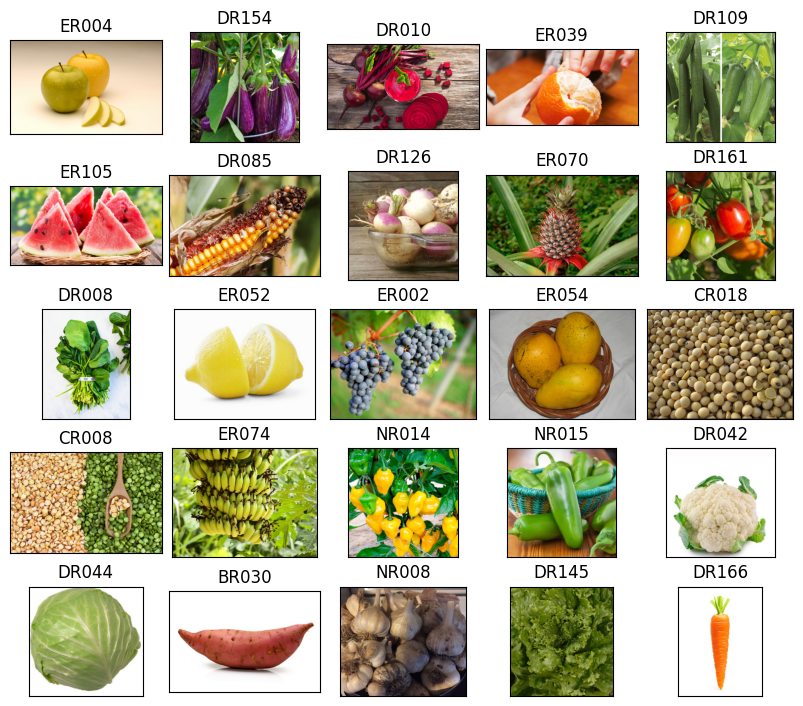

In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.filepath[i]))
    ax.set_title(df_unique.label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

# 2. Load the Images with a generator and Data Augmentation<a class="anchor" id="2"></a>

In [ ]:
# Configure image data generators for training, validation, and testing

# Image data generator for training set
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Image data generator for test set
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Generate training images in batches from the training DataFrame
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Generate validation images in batches from the validation DataFrame
val_images = train_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Generate test images in batches from the test DataFrame
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2597 validated image filenames belonging to 28 classes.
Found 292 validated image filenames belonging to 28 classes.
Found 299 validated image filenames belonging to 28 classes.


In [ ]:
# Load the pretrained model
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


# 3. Train the model<a class="anchor" id="3"></a>

In [ ]:
inputs = pretrained_model.input

# Add a dense layer with 128 units and ReLU activation after the pretrained model's output
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

# Add a final dense layer with 28 units and softmax activation for multiclass classification
outputs = tf.keras.layers.Dense(28, activation='softmax')(x)

# Create the model by specifying the inputs and outputs
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model using the provided training images and validation data
history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=12,
    callbacks=[
        # Use EarlyStopping callback to stop training if validation loss doesn't improve for 2 epochs
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/12
19/82 [=====>........................] - ETA: 2:29 - loss: 2.8674 - accuracy: 0.2582

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


82/82 [==============================] - 253s 3s/step - loss: 1.4802 - accuracy: 0.6045 - val_loss: 0.3232 - val_accuracy: 0.9315
Epoch 2/12
82/82 [==============================] - 237s 3s/step - loss: 0.4117 - accuracy: 0.8772 - val_loss: 0.1768 - val_accuracy: 0.9658
Epoch 3/12
82/82 [==============================] - 238s 3s/step - loss: 0.2155 - accuracy: 0.9403 - val_loss: 0.1794 - val_accuracy: 0.9623
Epoch 4/12
82/82 [==============================] - 239s 3s/step - loss: 0.1093 - accuracy: 0.9742 - val_loss: 0.1138 - val_accuracy: 0.9863
Epoch 5/12
82/82 [==============================] - 250s 3s/step - loss: 0.0632 - accuracy: 0.9892 - val_loss: 0.1197 - val_accuracy: 0.9692
Epoch 6/12
82/82 [==============================] - 258s 3s/step - loss: 0.0416 - accuracy: 0.9950 - val_loss: 0.0758 - val_accuracy: 0.9829
Epoch 7/12
82/82 [==============================] - 246s 3s/step - loss: 0.0245 - accuracy: 0.9961 - val_loss: 0.0780 - val_accuracy: 0.9829
Epoch 8/12
82/82 [======

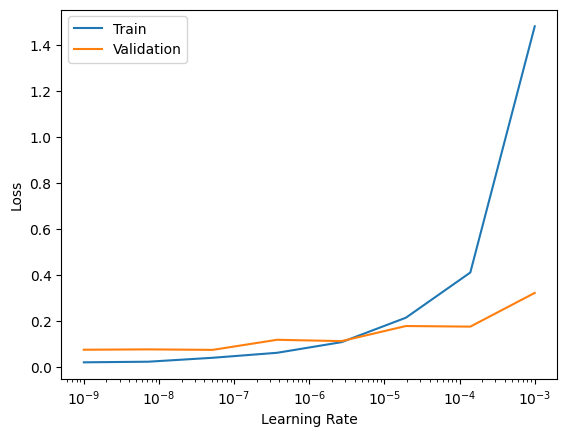

In [ ]:
# Plot learning rate vs loss
lrs = 1e-3 * np.power(0.1, np.linspace(0, 6, len(history.history['loss'])))

plt.semilogx(lrs, history.history['loss'])
plt.semilogx(lrs, history.history['val_loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

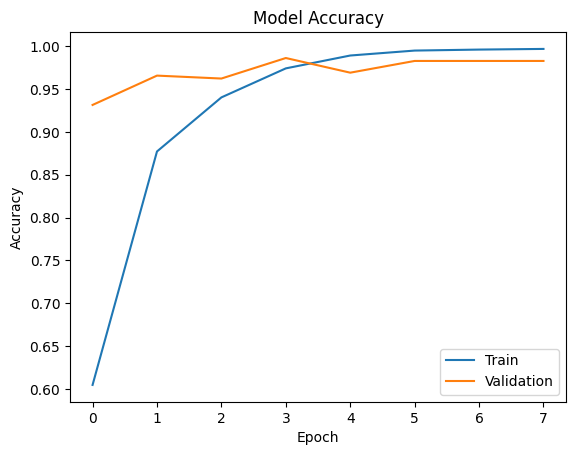

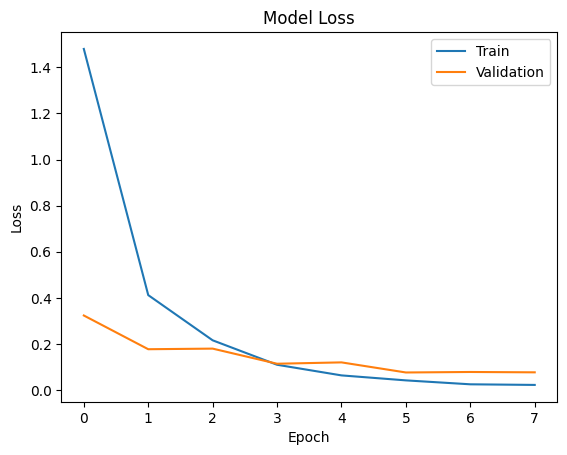

In [ ]:
#Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# 4. Visualize the result<a class="anchor" id="4"></a>

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

10/10 [==============================] - 28s 3s/step


In [ ]:
labels.items()

dict_items([(0, 'BR013'), (1, 'BR030'), (2, 'CR008'), (3, 'CR018'), (4, 'DR007'), (5, 'DR008'), (6, 'DR010'), (7, 'DR042'), (8, 'DR044'), (9, 'DR085'), (10, 'DR109'), (11, 'DR126'), (12, 'DR145'), (13, 'DR154'), (14, 'DR161'), (15, 'DR166'), (16, 'ER002'), (17, 'ER004'), (18, 'ER039'), (19, 'ER052'), (20, 'ER054'), (21, 'ER070'), (22, 'ER074'), (23, 'ER105'), (24, 'NR008'), (25, 'NR014'), (26, 'NR015'), (27, 'NR018')])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 98.33%


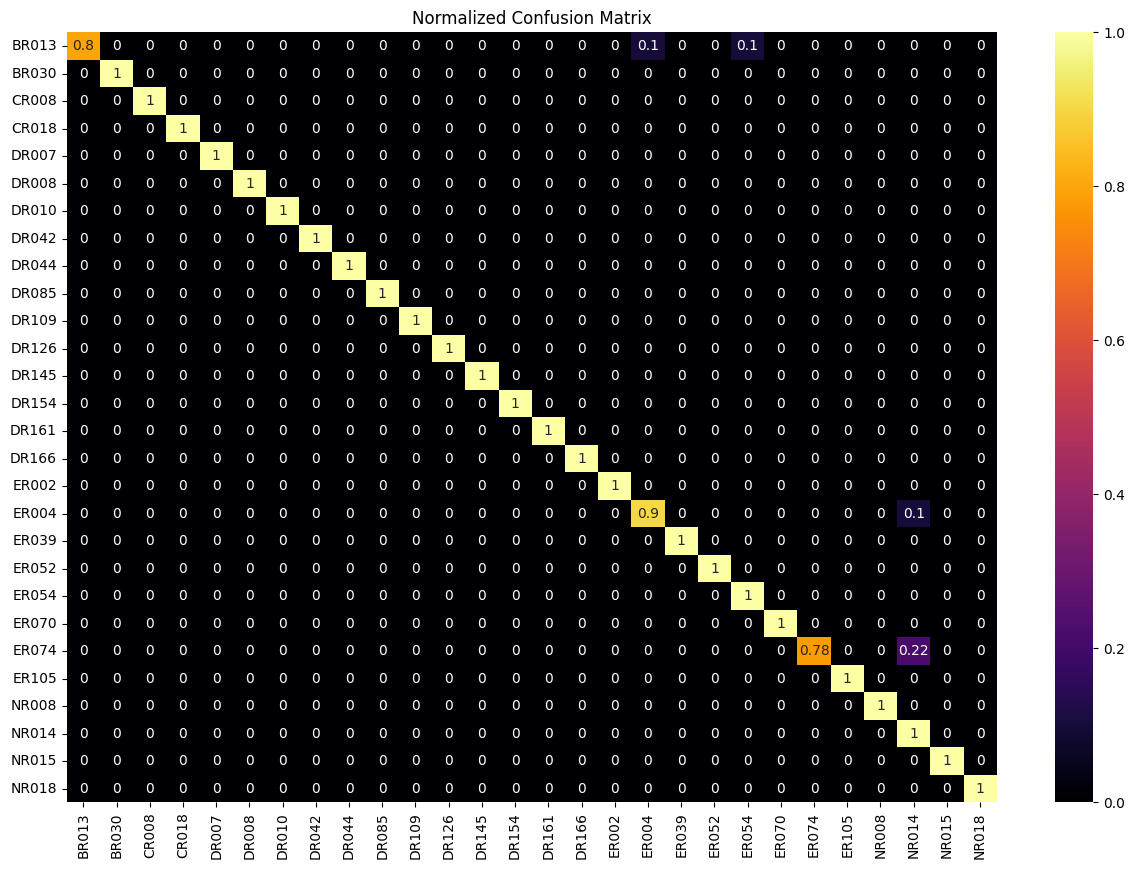

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix,
            cmap="inferno",
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )

# Set the title of the plot
plt.title('Normalized Confusion Matrix')

# Display the plot
plt.show()

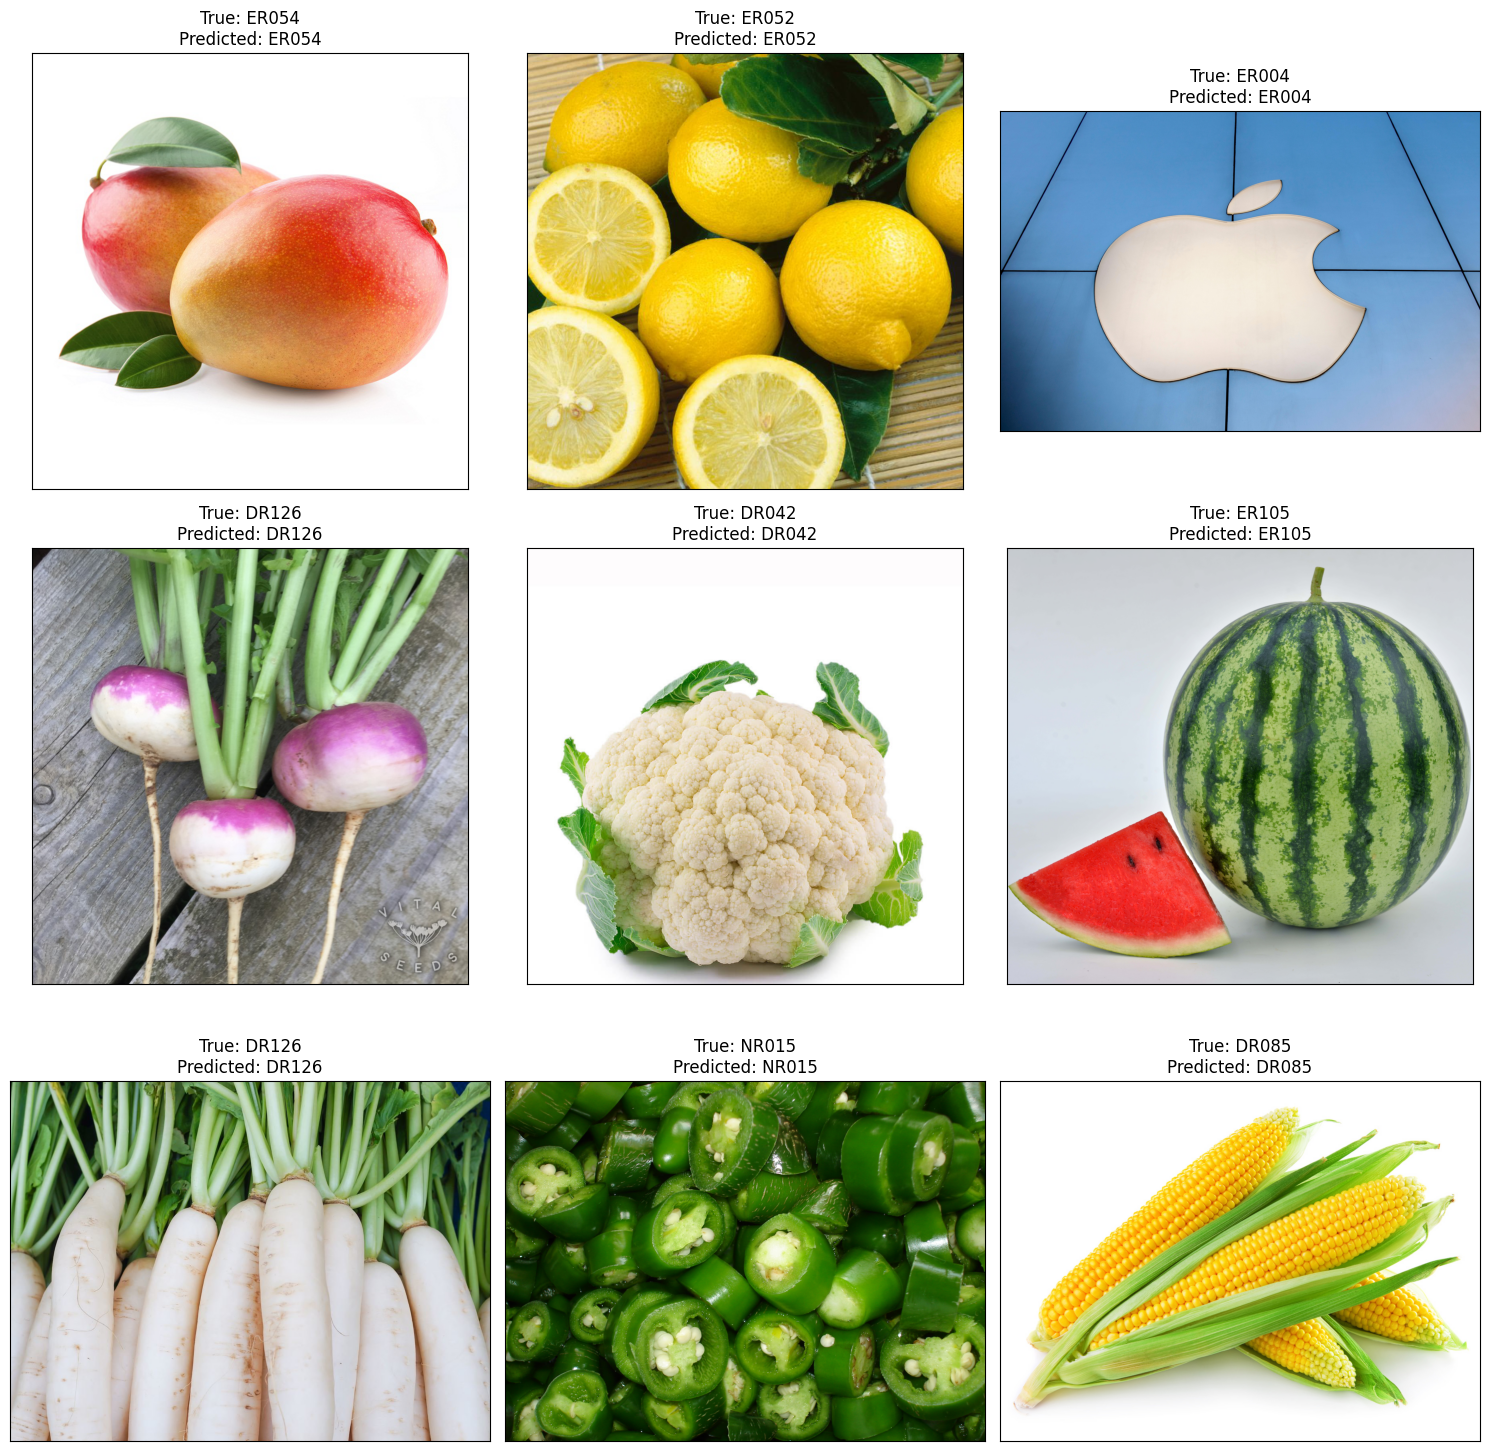

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.filepath.iloc[i]))
    ax.set_title(f"True: {test_df.label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

## 5. Class activation heatmap for image classification<a class="anchor" id="5"></a>
### Grad-CAM class activation visualization
*Code adapted from keras.io*

In [ ]:
import matplotlib.cm as cm

def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size "size"
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
#     display(Image(cam_path))
    
    return cam_path
    
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "Conv_1"
img_size = (224,224)

# Remove last layer's softmax
model.layers[-1].ativation = None

<ipython-input-20-9cd8e585cdf2>:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


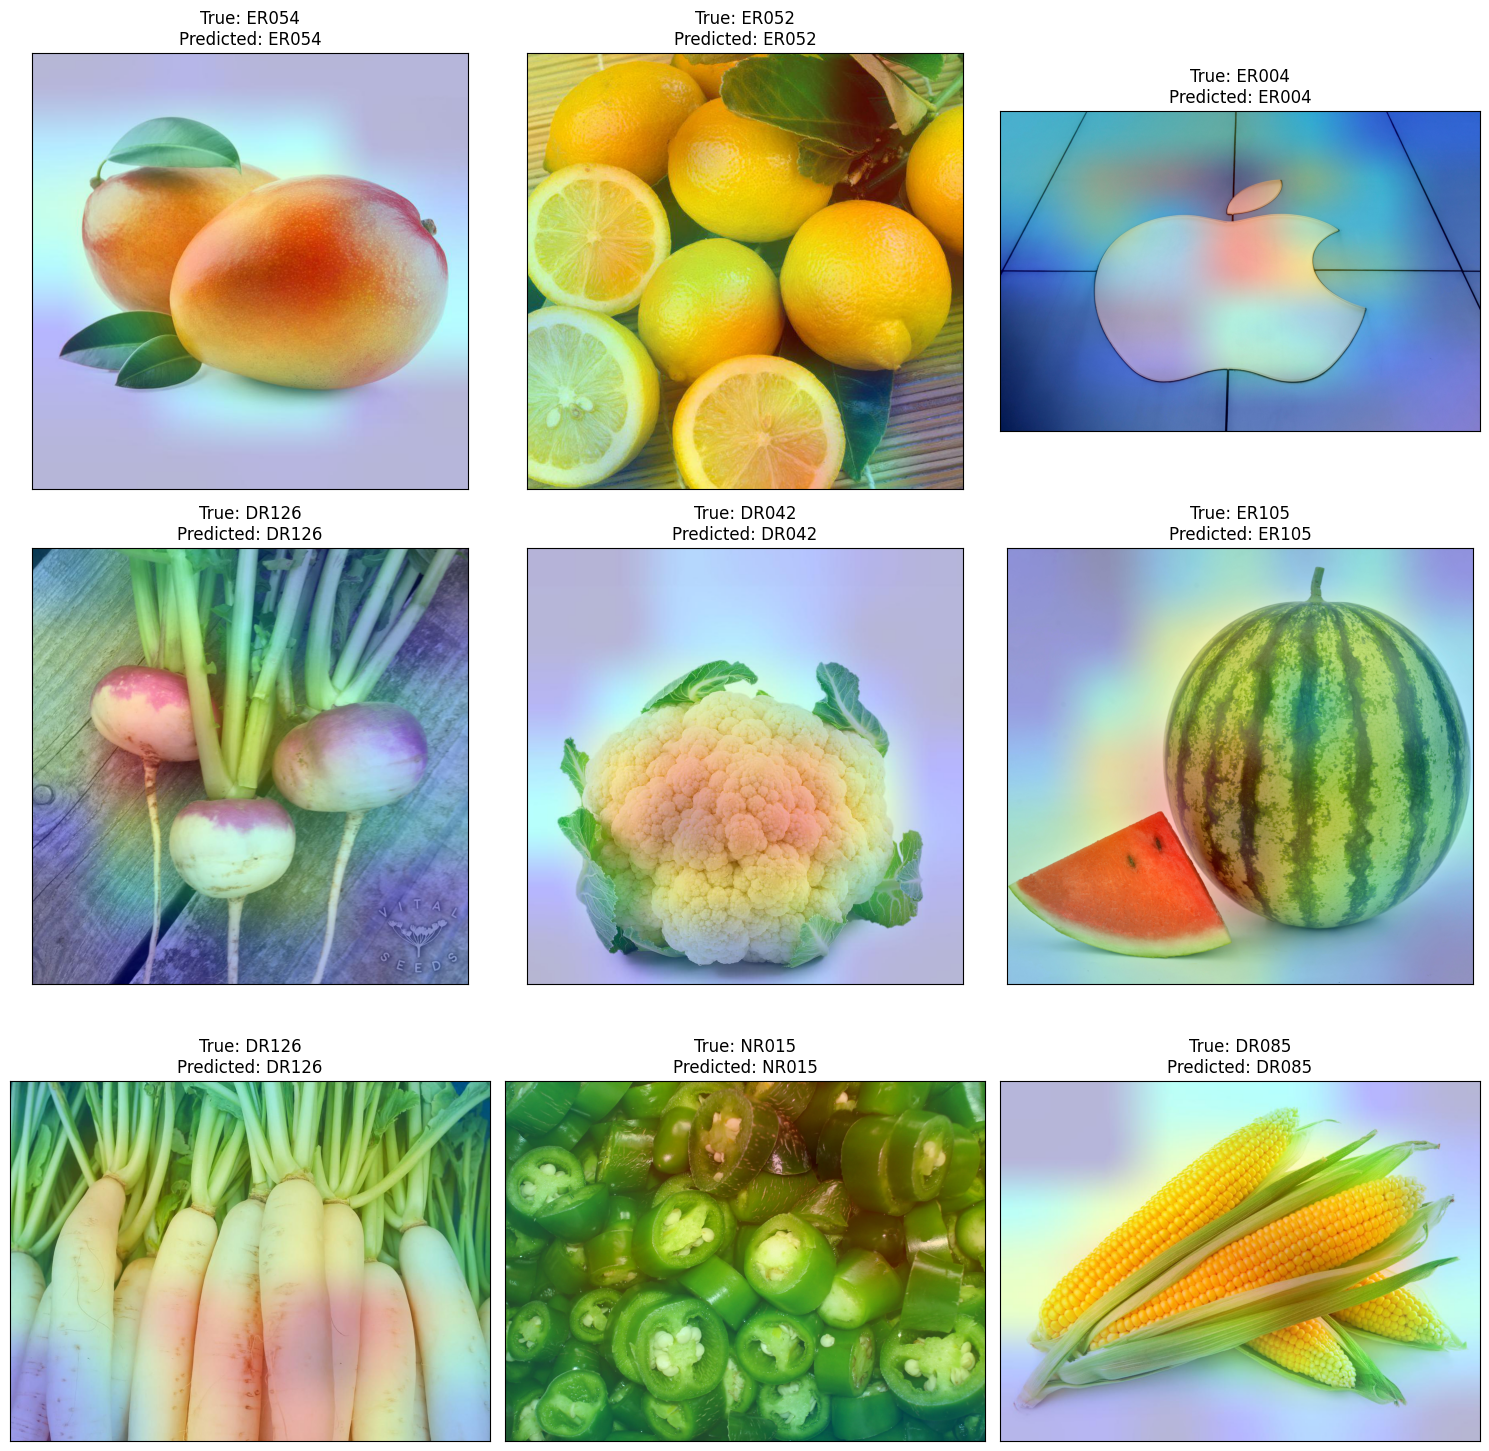

In [ ]:
# Display the part of the pictures used by the neural network to classify the pictures
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = test_df.filepath.iloc[i]
    img_array = preprocess_input(get_img_array(img_path, size=img_size))
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))
    ax.set_title(f"True: {test_df.label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
def output(location):
    from tensorflow.keras.preprocessing.image import load_img,img_to_array
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

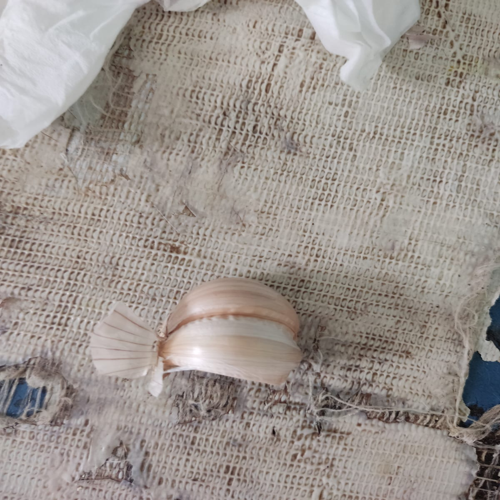

In [ ]:
from IPython.display import display
from PIL import Image
location = '/content/bawang.jpeg'
image = Image.open(location)
new_image = image.resize((500, 500))
display(new_image)

In [ ]:
img = output(location)
img

1/1 [==============================] - 1s 1s/step


'NR008'

In [ ]:
model.save('model_label_v2.h5')